# CSV 파일 불러오기

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns

data = pd.read_csv("iris.data", header = None)
df = pd.DataFrame(data)

index = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df.columns = index

df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Encodig

In [20]:
# module import

from sklearn.preprocessing import LabelEncoder

In [21]:
# 라벨 인코딩 함수
def label_encode(data, column):
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])
    return data

# 데이터(data)와 인코딩할 열(column)을 전달하여 label encoding 수행
df = label_encode(df, 'class')

# 상관 관계 행렬 출력해보기

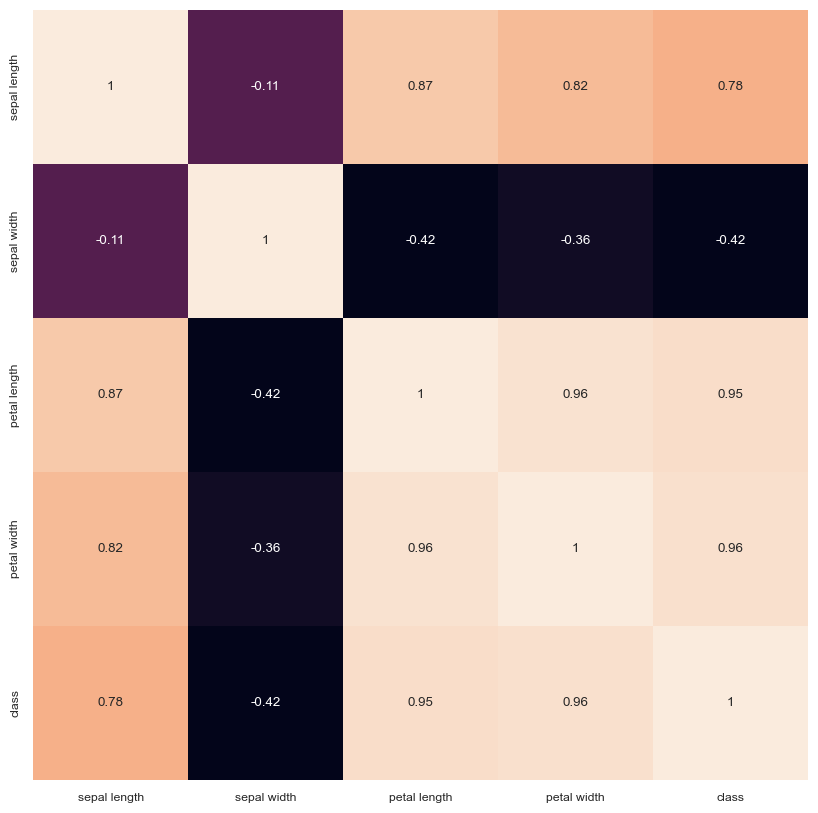

In [22]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

import matplotlib.pyplot as plt

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# sepal length 예측해보기

In [23]:
X = df.drop('sepal length', axis = 1)
X.head()

,sepal width,petal length,petal width,class
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0


In [24]:
Y = df['sepal length']
Y.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,
                                                  Y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


# 모델별로 MSE 분류해보기

In [26]:
# Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.34925633939767053


In [27]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.40875828228102407


In [28]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.33683099826009


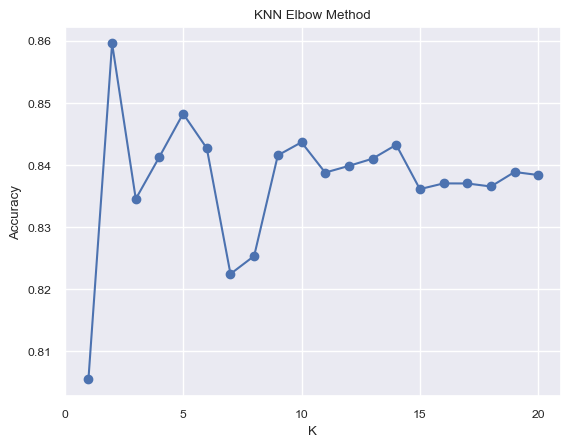

In [29]:
# KNN Algorithm (KNN elbow 구하기)

from sklearn.neighbors import KNeighborsRegressor

# 다양한 이웃 수(K)에 대해 정확도를 저장할 리스트 초기화
neighbors = list(range(1, 21))
accuracies = []

# 다양한 이웃 수에 대해 모델을 훈련하고 정확도를 평가
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    accuracies.append(score)

# 정확도를 시각화
plt.plot(neighbors, accuracies, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('KNN Elbow Method')
plt.xticks(range(0, 21, 5))
plt.show()


In [30]:
# KNN Algorithm

model = KNeighborsRegressor(n_neighbors = 15)
model.fit(X_train, y_train)

ky_pred = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ky_pred, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.3495054707355437


In [ ]:
# 결론 : Random Forest, Linear Regression, KNN Algorithm, Decision Tree 순서대로 정확도가 높았다.